<center> <img src ="https://i.postimg.cc/1X8H7YYt/BITS-Logo.png" width = "400" alt="BITS Pilani Logo" /> </center>

# **DATA EDA AND ML MODELING**

In [145]:
 #Import all required libraries for analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
%matplotlib inline
import nltk
import string
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('treebank')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics


from nltk.tag import hmm
from nltk.corpus import treebank


from imblearn.over_sampling import RandomOverSampler

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


In [146]:
# Import the dataset from the current drive
df =pd.read_csv("HumanTrafficking_CLEAN_Dataset.csv",index_col=0)
df.head(5)

,Title,Age,description,websiteRef,Minor,LangPattern,Trafficked
0,call girls in riya 24x7 hot sexy best housewif...,21,hyy guys https wa me i am riya inde...,1,1,1,1
1,no advance out call door step independent cal...,21,no advance direct payment hotel and hom...,1,1,0,0
2,call girls in jp nagar hot sexy independent gi...,21,professional escort services https w...,1,1,1,1
3,sneha independent kannada girl call me,21,sneha hand cash online payments for t...,0,1,0,0
5,call ammu 1500 shot 5500 night call girl avail...,21,get in touch in whatsapp now directly w...,1,1,0,0


In [147]:
# We have a total of 15 columns and 21,628 records in the given dataset
print(df.shape)

(172, 7)


In [148]:
# The dataset has the following information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 201
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        172 non-null    object
 1   Age          172 non-null    int64 
 2   description  172 non-null    object
 3   websiteRef   172 non-null    int64 
 4   Minor        172 non-null    int64 
 5   LangPattern  172 non-null    int64 
 6   Trafficked   172 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 10.8+ KB
None


In [149]:
# Counts all the null values in each observation
df.isnull().sum()

Title          0
Age            0
description    0
websiteRef     0
Minor          0
LangPattern    0
Trafficked     0
dtype: int64

In [150]:
df.describe()

,Age,websiteRef,Minor,LangPattern,Trafficked
count,172.000000,172.000000,172.000000,172.000000,172.000000
mean,21.912791,0.639535,0.470930,0.337209,0.360465
std,1.815611,0.481537,0.500612,0.474137,0.481537
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000
50%,22.000000,1.000000,0.000000,0.000000,0.000000
75%,23.000000,1.000000,1.000000,1.000000,1.000000
max,38.000000,1.000000,1.000000,1.000000,1.000000


# **Visualize the Tabular Columns**

In [151]:
cols=['websiteRef','Minor'  ,'LangPattern' ]
df_new =df[cols]
df_new

,websiteRef,Minor,LangPattern
0,1,1,1
1,1,1,0
2,1,1,1
3,0,1,0
5,1,1,0
...,...,...,...
196,0,0,1
197,1,1,0
198,1,0,0
199,1,0,1


In [152]:
for column in df_new:
  print(column)
  print(df_new[column].value_counts())

websiteRef
1    110
0     62
Name: websiteRef, dtype: int64
Minor
0    91
1    81
Name: Minor, dtype: int64
LangPattern
0    114
1     58
Name: LangPattern, dtype: int64


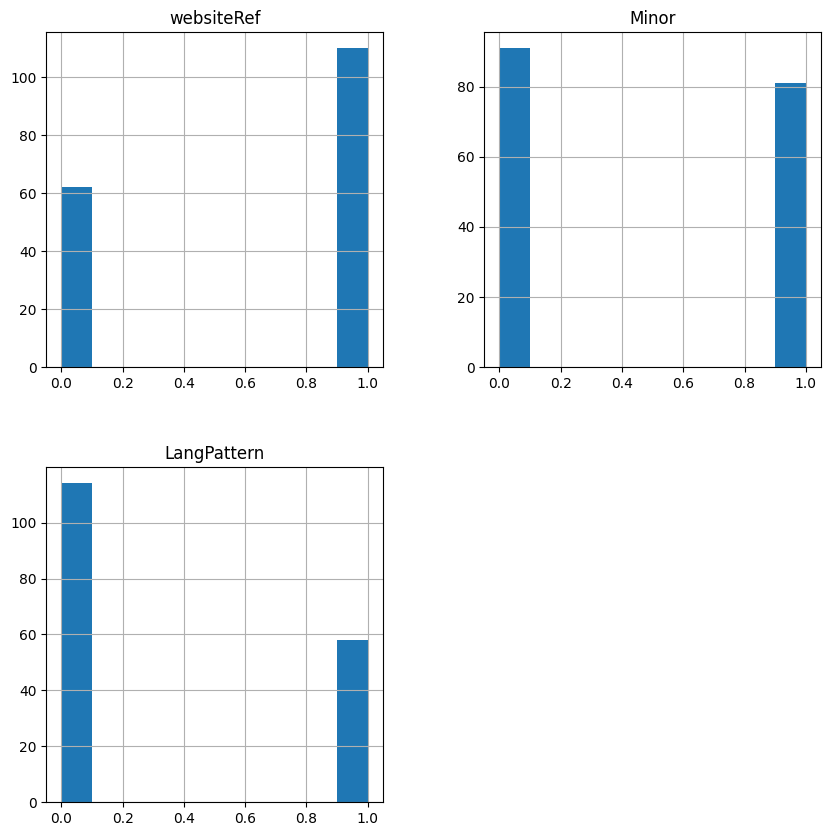

In [153]:
df_new.hist(figsize=(10,10));

<Axes: >

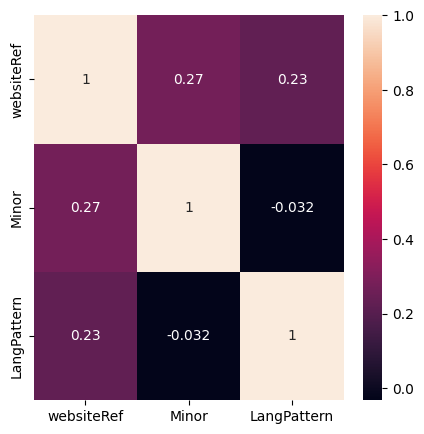

In [154]:
cor=df_new.corr()
plt.figure(figsize=(5,5))
sns.heatmap(cor,annot=True)

In [155]:
#Correlation between columns in Tabular format
df_new.corr()

,websiteRef,Minor,LangPattern
websiteRef,1.000000,0.271644,0.228139
Minor,0.271644,1.000000,-0.032373
LangPattern,0.228139,-0.032373,1.000000


<Axes: title={'center': 'Correlation with Trafficked'}>

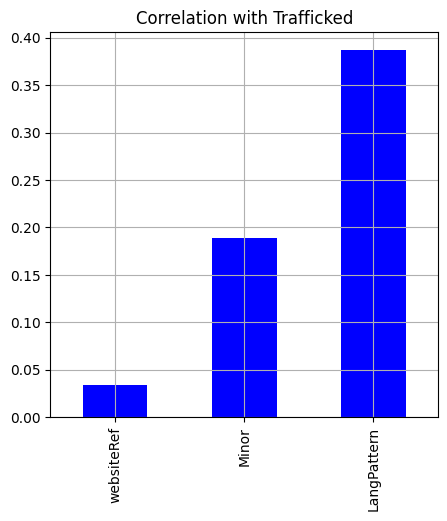

In [156]:
df_new.corrwith(df.Trafficked).plot(kind='bar', grid=True, figsize=(5, 5)
, title="Correlation with Trafficked",color="Blue")

**CONCLUSION** : We can see the '**Minor**' and '**LangPattern**' is higly correlatted with Trafficking  as it helps in detecting it

# Visualize the **Description** and **Title** on Word cloud

**Normalize Description by using Stemming or Lemmatization.**

In [157]:
#Lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [158]:
#stemming
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

In [159]:
df['description'] = df['description'].apply(lambda text: lemmatize_words(text))
print(df['description'])

0      hyy guy http wa me i am riya independent horny...
1      no advance direct payment hotel and home doore...
2      professional escort service http wa me call gi...
3      sneha hand cash online payment for the girl no...
5      get in touch in whatsapp now directly whatsapp...
                             ...                        
196    hi am vidya staying alone call me or whatsapp ...
197    hi my shelf sahana http wa me here personal nu...
198    woman seeking men bangalore direct message me ...
199    directly telegram message me directly because ...
201    hi i am radhika kannada http wa me i m indepen...
Name: description, Length: 172, dtype: object


In [160]:
df['description'] = df['description'].apply(lambda x: stem_words(x))
print(df['description'])

0      hyy guy http wa me i am riya independ horni ca...
1      no advanc direct payment hotel and home door s...
2      profession escort servic http wa me call girl ...
3      sneha hand cash onlin payment for the girl no ...
5      get in touch in whatsapp now directli whatsapp...
                             ...                        
196    hi am vidya stay alon call me or whatsapp onli...
197    hi my shelf sahana http wa me here person numb...
198    woman seek men bangalor direct messag me on te...
199    directli telegram messag me directli becaus te...
201    hi i am radhika kannada http wa me i m indepen...
Name: description, Length: 172, dtype: object


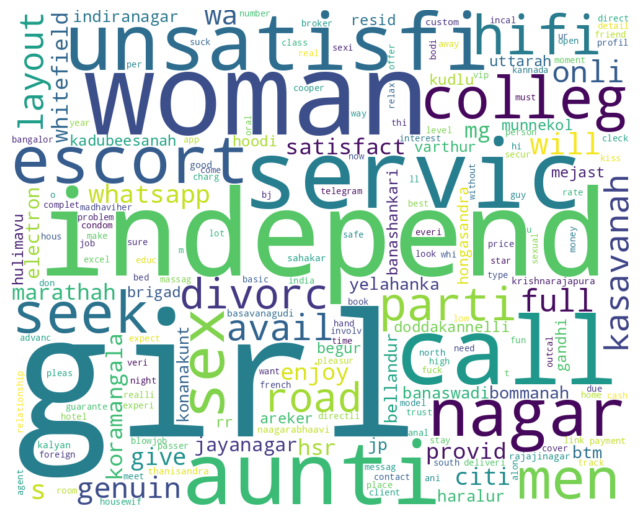

In [161]:
#Creating the text variable
text = " ".join(word  for word in df['description'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(width = 1000, height = 800, collocations = False, background_color = 'white',
                min_font_size = 10).generate(text)
# Display the generated Word Cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [162]:
df['Title'] = df['Title'].apply(lambda text: lemmatize_words(text))
print(df['Title'])

0      call girl in riya 24x7 hot sexy best housewife...
1      no advance out call door step independent call...
2      call girl in jp nagar hot sexy independent gir...
3                 sneha independent kannada girl call me
5      call ammu 1500 shot 5500 night call girl avail...
                             ...                        
196                     i am vidya independent call girl
197    no broker sahana direct independent girl out c...
198    hey kannada call girl bangalore genuine full s...
199    call girl in bangalore low price vip girl avai...
201    i m radhika kannada cash independent call girl...
Name: Title, Length: 172, dtype: object


In [163]:
df['Title'] = df['Title'].apply(lambda x: stem_words(x))
print(df['Title'])

0      call girl in riya 24x7 hot sexi best housewif ...
1      no advanc out call door step independ call gir...
2      call girl in jp nagar hot sexi independ girl s...
3                    sneha independ kannada girl call me
5      call ammu 1500 shot 5500 night call girl avail...
                             ...                        
196                        i am vidya independ call girl
197    no broker sahana direct independ girl out call...
198    hey kannada call girl bangalor genuin full sex...
199       call girl in bangalor low price vip girl avail
201    i m radhika kannada cash independ call girl in...
Name: Title, Length: 172, dtype: object


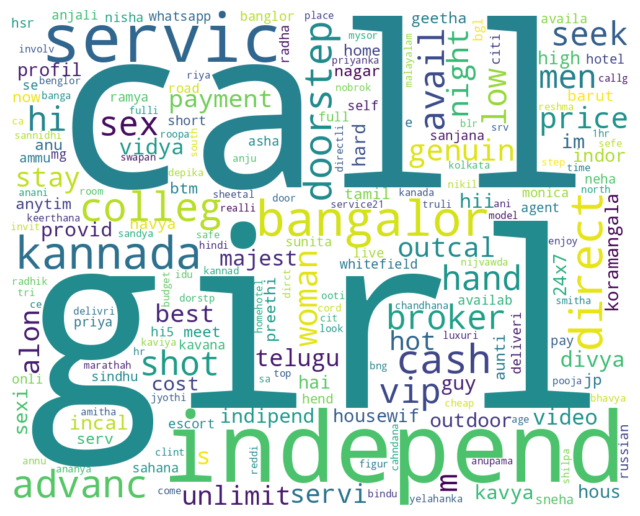

In [164]:
#Creating the text variable
text = " ".join(word  for word in df['Title'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(width = 1000, height = 800, collocations = False, background_color = 'white',
                min_font_size = 10).generate(text)
# Display the generated Word Cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

------------------- EDA AND VISUALIZE ENDS--------------------------------

# **ML MODELLING**

# **MODEL 1** :Descision tree model

**TASK** -Create a TF-IDF object and split the data into training and testing sets. Train a Decision tree model. Display the confusion Matrix for both train and test.

In [165]:
#Creating two objects X and y
X= df['description'].values
y= df['Trafficked'].values

In [166]:
#Create Training set and test  set for TF-IDF object
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


In [168]:
#Creating TFid object
tf_idf = TfidfVectorizer()
#applying tf idf to training data
X_train_tf = tf_idf.fit_transform(X_train)
#applying tf idf to training data
X_train_tf = tf_idf.transform(X_train)

In [169]:
# Let us check the dimensions of the data now.
print("n_samples: %d, n_features: %d" % X_train_tf.shape)

n_samples: 137, n_features: 1135


In [170]:
tfidf = pd.DataFrame(np.round(X_train_tf.A,3), columns=tf_idf.get_feature_names_out())

tfidf['girl']


0      0.084
1      0.295
2      0.090
3      0.032
4      0.070
       ...  
132    0.133
133    0.205
134    0.207
135    0.192
136    0.092
Name: girl, Length: 137, dtype: float64

In [171]:
#transforming test data into tf-idf matrix
X_test_tf = tf_idf.transform(X_test)
print("n_samples: %d, n_features: %d" % X_test_tf.shape)

n_samples: 35, n_features: 1135


**DESICION TREE MODEL**

In [172]:
#Decision Tree Modelling
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train_tf, y_train)
DecisionTreeRegressor(random_state=0)

DecisionTreeRegressor(random_state=0)

In [173]:
y_pred = np.round(regressor.predict(X_test_tf))
np.set_printoptions(precision = 1)

In [174]:
y_pred

array([1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0.])

In [175]:
print("Confusion Matrix: Test Data")
conf_matrix=metrics.confusion_matrix(y_test, y_pred)
print(metrics.confusion_matrix(y_test, y_pred))

Confusion Matrix: Test Data
[[15  4]
 [ 8  8]]


In [176]:
true_neg, false_pos, false_neg, true_pos = conf_matrix.ravel()

true_neg, false_pos, false_neg, true_pos

(15, 4, 8, 8)

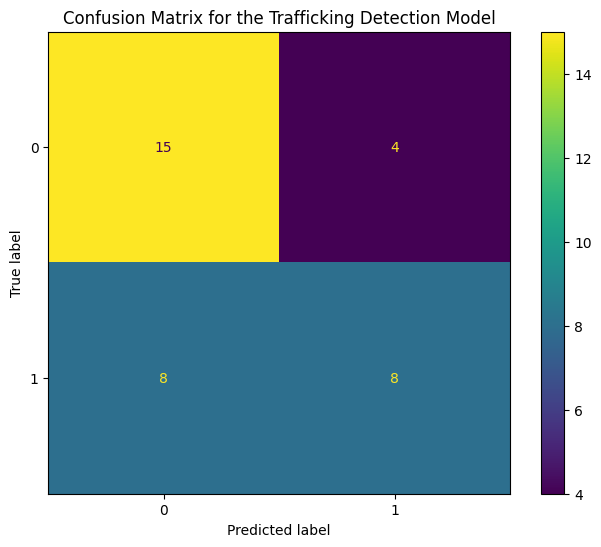

In [177]:
from sklearn.metrics import ConfusionMatrixDisplay

# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(conf_matrix)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Trafficking Detection Model')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);

In [178]:
#classification report -
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred, target_names=['0', '1']))

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.79      0.71        19
           1       0.67      0.50      0.57        16

    accuracy                           0.66        35
   macro avg       0.66      0.64      0.64        35
weighted avg       0.66      0.66      0.65        35



In [179]:
#accuracy_score
from  sklearn.metrics  import accuracy_score
predicted = regressor.predict(X_test_tf)
print("Accuracy Score of Model :" , accuracy_score(y_test,np.round(predicted)))


Accuracy Score of Model : 0.6571428571428571


# Decision Tree model has a fit of **65.7%**

In [180]:
#Creating two objects X and y
X1= df['description'].values
y1= df['Trafficked'].values

In [181]:
bow_article =  CountVectorizer().fit(X1)
countVector = bow_article.get_feature_names_out()
print(countVector)

['aadil' 'aarthireddi' 'abl' ... 'yourself' 'yr' 'zoyalana']


In [182]:
article_vec = bow_article.transform(X1)
countVectorArray = bow_article.get_feature_names_out()
countVectorArray

array(['aadil', 'aarthireddi', 'abl', ..., 'yourself', 'yr', 'zoyalana'],
      dtype=object)

In [183]:
df_bow=pd.DataFrame(article_vec.toarray(),columns=countVectorArray)

In [184]:
df_bow['Trafficked']=df['Trafficked']

In [185]:
df_bow = df_bow.dropna(how='any',axis=0)

# **MODEL 2** :Naive Bayes model

**TASK** : Split the data into training and testing sets. Train a **GNB**  model. Display the Metrics for both train and test.

In [186]:
# Selecting correalted columns
#X=df[['websiteRef','Minor','LangPattern' ]]
X=df_bow.drop(['Trafficked'],axis=1)
X

,aadil,aarthireddi,abl,about,abov,ac,accept,accomad,accommod,accomod,...,yelahanka,yer,yeshwantpur,you,youcal,young,your,yourself,yr,zoyalana
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,3,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,2,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
165,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
169,0,0,0,2,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
170,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
#y= df['Trafficked']
y=df_bow.iloc[:,-1]

In [188]:
ovs=RandomOverSampler(random_state=42)
X1,y1=ovs.fit_resample(X,y)

## Creating Training set and Test set

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [190]:
print(y_train)

118    0.0
142    0.0
163    1.0
38     1.0
139    1.0
      ... 
71     1.0
106    0.0
14     1.0
92     0.0
102    0.0
Name: Trafficked, Length: 139, dtype: float64


In [191]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Predicting the Test set results

In [192]:
y_pred = classifier.predict(X_test)
y_pred_Train=classifier.predict(X_train)

In [193]:
y_pred = classifier.predict(X_test)
y_pred_Train=classifier.predict(X_train)

In [194]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Training Accuracy::::      ",accuracy_score(y_train,y_pred_Train))
print("Testing Accuracy::::      ",accuracy_score(y_test,y_pred))

Training Accuracy::::       0.9136690647482014
Testing Accuracy::::       0.7714285714285715


In [195]:
from sklearn import metrics
MAE_NB =metrics.mean_absolute_error(y_test,y_pred)
MSE_NB= metrics.mean_squared_error(y_test,y_pred)
RMSE_NB = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

In [196]:
print("Confusion Matrix: Test Data")
conf_matrix=metrics.confusion_matrix(y_test, y_pred)
print(metrics.confusion_matrix(y_test, y_pred))

Confusion Matrix: Test Data
[[19  4]
 [ 4  8]]


In [197]:
#classification report -
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred, target_names=['0', '1']))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        23
           1       0.67      0.67      0.67        12

    accuracy                           0.77        35
   macro avg       0.75      0.75      0.75        35
weighted avg       0.77      0.77      0.77        35



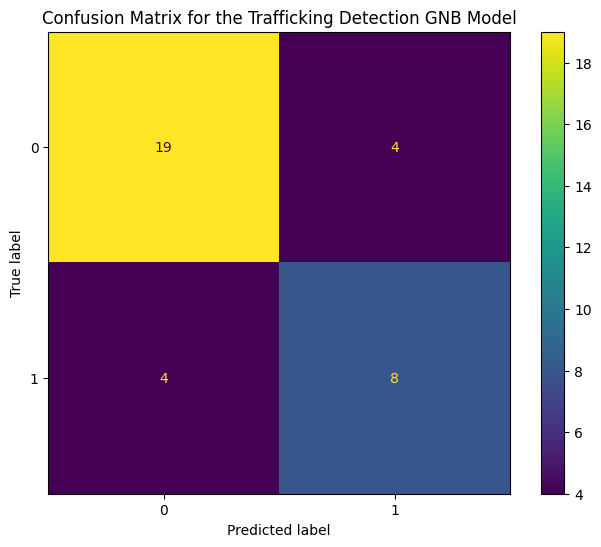

In [198]:
from sklearn.metrics import ConfusionMatrixDisplay

# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(conf_matrix)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Trafficking Detection GNB Model')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);

In [199]:
dict = {'MSE' : [MSE_NB],
        'MAE ' :  [MAE_NB],
        'RMSE ' : [RMSE_NB]}
scores = pd.DataFrame(dict,index=['Naive Bayes'])
scores

,MSE,MAE,RMSE
Naive Bayes,0.228571,0.228571,0.478091


# Naive Bayes model has a fit of **77.1%** :

# **MODEL 3**: RANDOM FOREST

In [200]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [201]:
classifier.fit(X_train, y_train)
classifier.predict(X_test)


array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       1.])

## Predicting the Test set results

In [202]:
y_pred = classifier.predict(X_test)
y_pred_Train=classifier.predict(X_train)

In [203]:
y_pred

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       1.])

In [204]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Training Accuracy::::      ",accuracy_score(y_train,y_pred_Train))
print("Testing Accuracy::::      ",accuracy_score(y_test,y_pred))

Training Accuracy::::       0.9496402877697842
Testing Accuracy::::       0.6285714285714286


In [205]:
print("Confusion Matrix: Test Data")
conf_matrix=metrics.confusion_matrix(y_test, y_pred)
print(metrics.confusion_matrix(y_test, y_pred))

Confusion Matrix: Test Data
[[15  8]
 [ 5  7]]


In [206]:
#classification report -
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred, target_names=['0', '1']))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.65      0.70        23
           1       0.47      0.58      0.52        12

    accuracy                           0.63        35
   macro avg       0.61      0.62      0.61        35
weighted avg       0.65      0.63      0.64        35



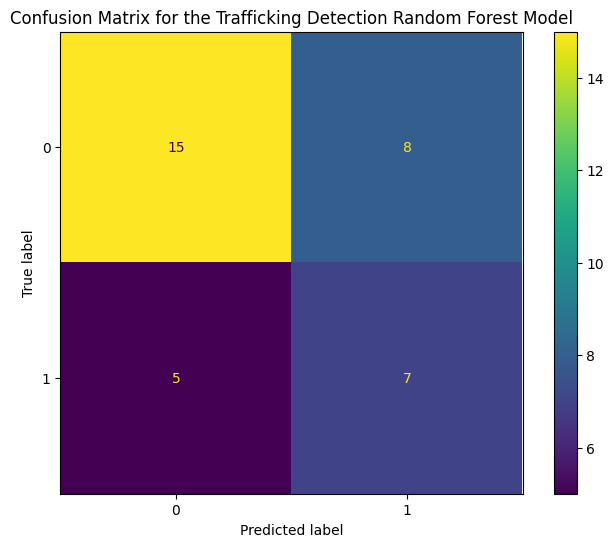

In [207]:
from sklearn.metrics import ConfusionMatrixDisplay

# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(conf_matrix)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Trafficking Detection Random Forest Model')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);

In [208]:
from sklearn import metrics
MAE =metrics.mean_absolute_error(y_test,y_pred)
MSE= metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

In [209]:
dict = {'MSE' : [MSE_NB],
        'MAE ' :  [MAE_NB],
        'RMSE ' : [RMSE_NB]}
scores = pd.DataFrame(dict,index=['Randon Forest'])
scores

,MSE,MAE,RMSE
Randon Forest,0.228571,0.228571,0.478091


# Random Forest model has a fit of **62%** :

## **MODEL 4**: LOGISTICS REGRESSION#

In [210]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [211]:
y_pred = classifier.predict(X_test)
y_pred_Train=classifier.predict(X_train)

In [212]:
y_pred

array([1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       1.])

In [213]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Training Accuracy::::      ",accuracy_score(y_train,y_pred_Train))
print("Testing Accuracy::::      ",accuracy_score(y_test,y_pred))

Training Accuracy::::       0.935251798561151
Testing Accuracy::::       0.6571428571428571


In [214]:
print("Confusion Matrix: Test Data")
conf_matrix=metrics.confusion_matrix(y_test, y_pred)
print(metrics.confusion_matrix(y_test, y_pred))

Confusion Matrix: Test Data
[[14  9]
 [ 3  9]]


In [215]:
#classification report -
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred, target_names=['0', '1']))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.61      0.70        23
           1       0.50      0.75      0.60        12

    accuracy                           0.66        35
   macro avg       0.66      0.68      0.65        35
weighted avg       0.71      0.66      0.67        35



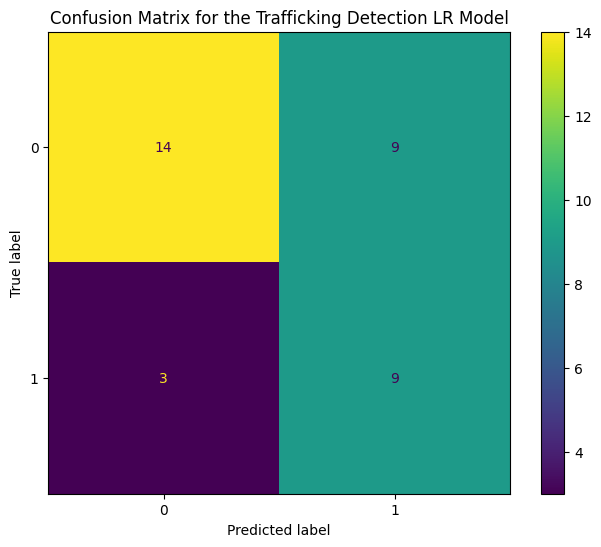

In [216]:
from sklearn.metrics import ConfusionMatrixDisplay

# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(conf_matrix)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Trafficking Detection LR Model')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);

In [217]:
classifier.score(X_test, y_test)

0.6571428571428571

# Logsitics Regression model has a fit of **65%** :

# CONCLUSION:

